<a href="https://colab.research.google.com/github/Rupneetk/intro_on_python_application/blob/master/Class5_Intro_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data

In [0]:
cars_data=data.cars()
cars_data.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [0]:
cars_data.Origin.unique()

array(['USA', 'Europe', 'Japan'], dtype=object)

Seaborn:Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [0]:
import seaborn as sns

Scatter plot in Seaborn and addition of more details into the graph

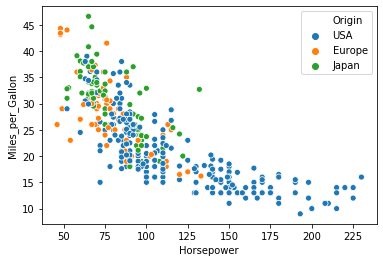

In [0]:
sns.scatterplot(x='Horsepower', y='Miles_per_Gallon', data= cars_data, hue='Origin')

Creating a new column and naming it Y from the year coloumn

In [0]:
cars_data['Y']=pd.to_datetime(cars_data['Year'],format='%Y-%M-%D',infer_datetime_format=True)
cars_data['Y']=pd.DatetimeIndex(cars_data['Year']).year
cars_data.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin,Y
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA,1970
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA,1970
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA,1970
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA,1970
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA,1970


Line plot

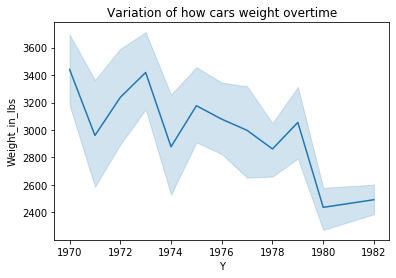

In [0]:
sns.lineplot(x='Y', y='Weight_in_lbs',data=cars_data)
plt.title('Variation of how cars weight overtime')
plt.show()

Adding more details in the line plot

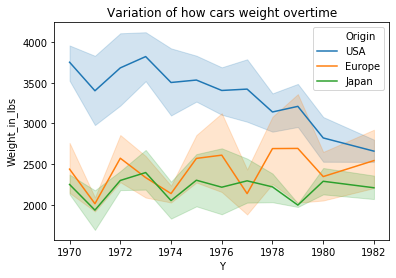

In [0]:
sns.lineplot(x='Y', y='Weight_in_lbs',data=cars_data, hue='Origin')
plt.title('Variation of how cars weight overtime')
plt.show()

Ploting 2 graphs side by side ... subplot(rows,column,location of your plot)

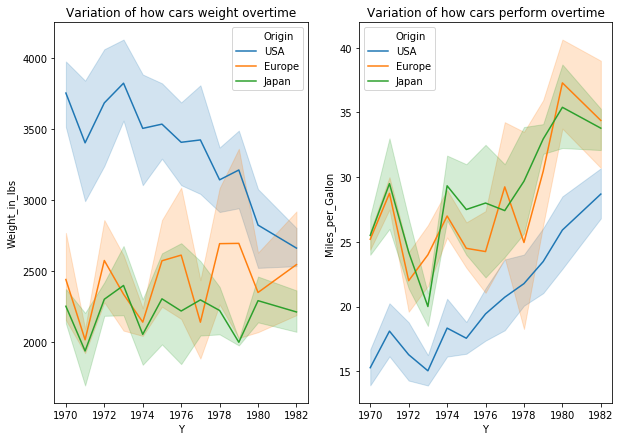

In [0]:
# having plots adjacent to one another
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.lineplot(x='Y', y='Weight_in_lbs',data=cars_data, hue='Origin')
plt.title('Variation of how cars weight overtime')

plt.subplot(1,2,2)
sns.lineplot(x='Y', y='Miles_per_Gallon',data=cars_data, hue='Origin')
plt.title('Variation of how cars perform overtime')
plt.show()

Distribution of x and y variable in scatter plot for indepth analysis

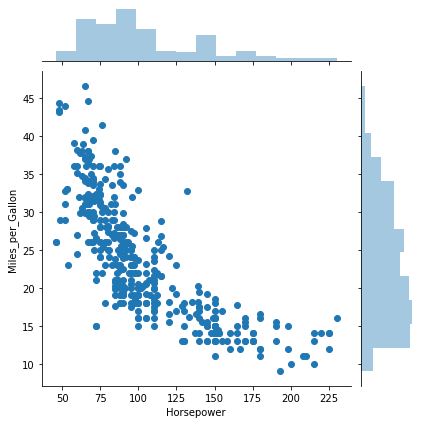

In [0]:
# shows the distribution (Histogram) of x and y variables
sns.jointplot(x='Horsepower', y='Miles_per_Gallon', data= cars_data)

Histogram--- Distribution of single variable

(array([31., 91., 59., 55., 39., 40., 31., 36., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <a list of 10 Patch objects>)

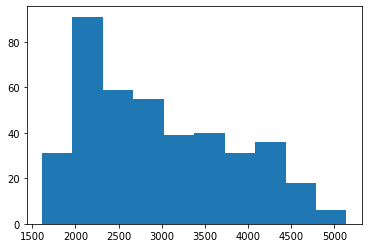

In [0]:
# histogram in matplotlib
plt.hist(cars_data.Weight_in_lbs)

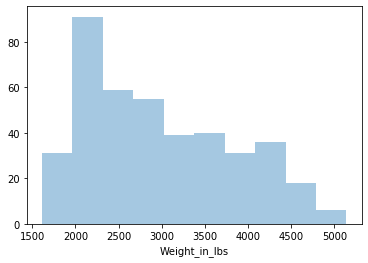

In [0]:
#Histogram in seaborn
sns.distplot(cars_data.Weight_in_lbs, hist=True, kde=False)

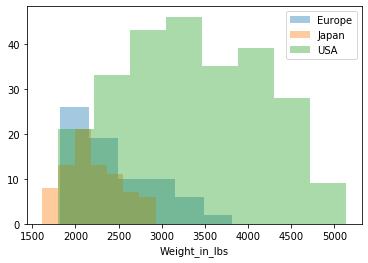

In [0]:
# Used for loop to group datas in python ... and ploted the graph using the loop
group_by=cars_data.groupby('Origin')
for group in group_by:
  sns.distplot(group[1].Weight_in_lbs,kde=False, norm_hist=False, hist=True, label=group)
plt.legend()
plt.show()

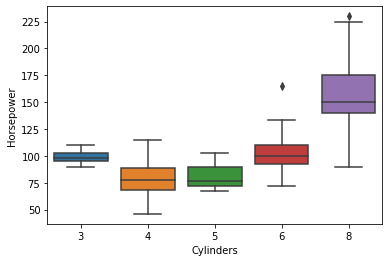

In [0]:
# Statistical distribution of different categories w.r.t horsepower
sns.boxplot(x='Cylinders', y='Horsepower', data=cars_data)
plt.show()

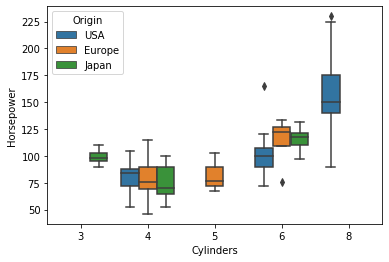

In [0]:
# added a hue to see how cars from different origin perform
sns.boxplot(x='Cylinders', y='Horsepower', data=cars_data, hue='Origin')
plt.show()

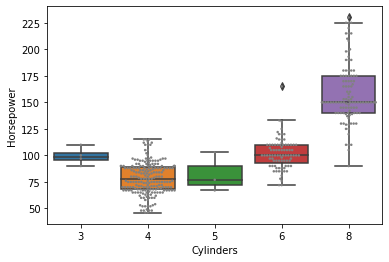

In [0]:
# adding the jitter on the box plot to understand the distribution of data in detail
sns.boxplot(x='Cylinders', y='Horsepower', data=cars_data)
sns.swarmplot(x='Cylinders', y='Horsepower', data=cars_data,size=2.5, color='grey')
plt.show()

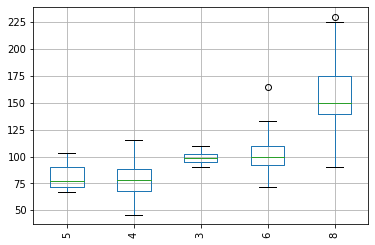

In [0]:
# Align the data with increasing median
def boxplot_sorted(df,by,column):
  df2=pd.DataFrame({col:vals[column] for col,vals in df.groupby(by)})
  meds=df2.median().sort_values()
  df2[meds.index].boxplot(rot=90)


boxplot_sorted(cars_data, by=['Cylinders'], column='Horsepower')

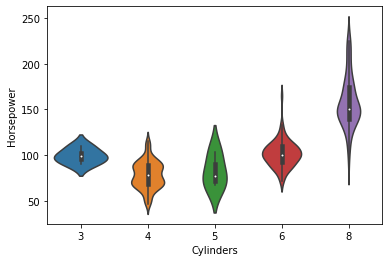

In [0]:
# Violin plot showing the distribution of the category
sns.violinplot(x='Cylinders', y='Horsepower', data=cars_data)

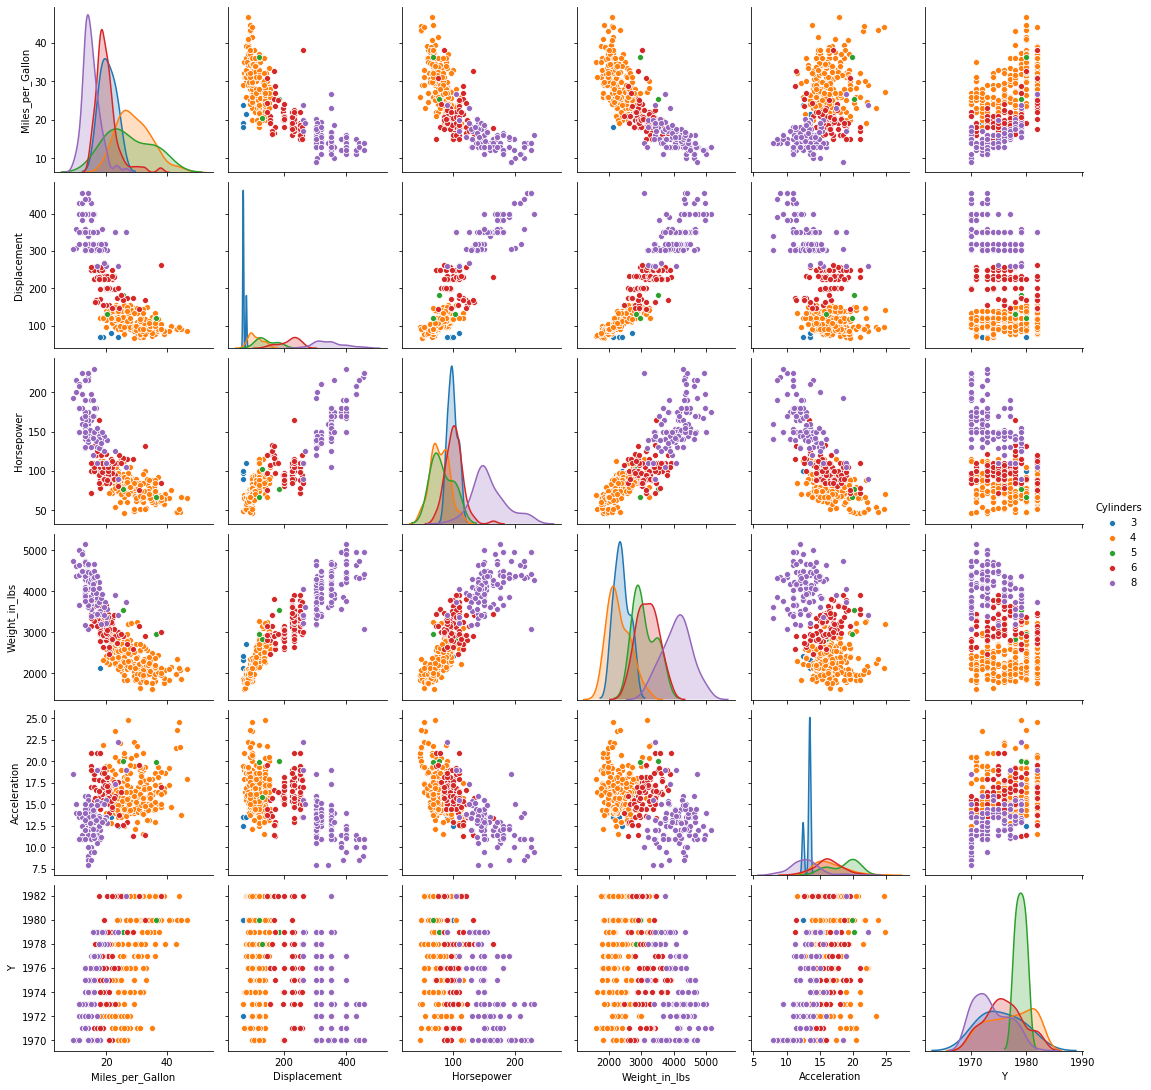

In [0]:
# Understanding the distribution of the data w.r.t different variables
sns.pairplot(cars_data, kind='scatter', hue='Cylinders')

In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related. (WIKIPEDIA)

In [0]:
# Understanding the relation of the data with one variable and the other
correlation_table=cars_data.corr()
correlation_table

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
Miles_per_Gallon,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289
Cylinders,-0.775396,1.000000,0.951787,0.844158,0.895220,-0.522452
Displacement,-0.804203,0.951787,1.000000,0.898326,0.932475,-0.557984
Horsepower,-0.778427,0.844158,0.898326,1.000000,0.866586,-0.697124
Weight_in_lbs,-0.831741,0.895220,0.932475,0.866586,1.000000,-0.430086
Acceleration,0.420289,-0.522452,-0.557984,-0.697124,-0.430086,1.000000


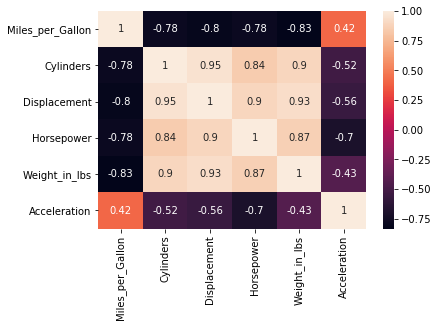

In [0]:
sns.heatmap(correlation_table, annot=True)

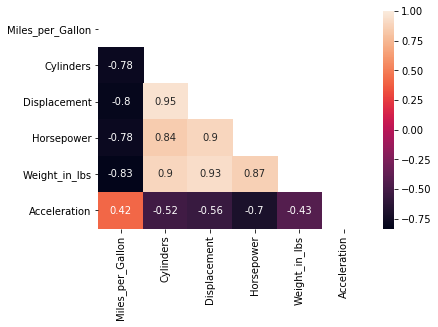

In [0]:
import numpy as np
# Masking the repeated values 
sns.heatmap(correlation_table, annot=True, mask=np.triu(np.ones_like(correlation_table)))